In [9]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## make some job files for Ar
num_per_chunk = 1e7
nmc_zero_mass = 1e10
nmc_nonzero_mass = 1e8
num_reps_per_file = 100

iso = "ar_37"
mnu = 0

job_file = "/home/dcm42/impulse/steriles/job_files/ar_37_jobs.txt"
jf = open(job_file, 'wt')
nchunks = int(nmc_zero_mass/(num_reps_per_file*num_per_chunk))
print(nchunks)
for i in range(nchunks):
    jf.write("module load miniconda; source activate; conda activate py37_dev; python calculate_pdfs.py %s %.1f %d %d\n"%(iso, mnu, num_reps_per_file, i))
jf.close()

# 100 reps and 1e7 per chunk is 1.5 gb and 15 minutes
# dsq --job-file job_files/ar_37_jobs.txt --mem-per-cpu 4g -t 30:00 --mail-type NONE

iso_dat = np.loadtxt("/home/dcm42/impulse/steriles/data_files/%s.txt"%iso, delimiter=',', skiprows=3)
Q, t12, A = iso_dat[0, :]
## now as a function of sterile mass
mass_list = np.linspace(1, Q, 100)


FileNotFoundError: [Errno 2] No such file or directory: '/home/dcm42/impulse/steriles/job_files/ar_37_jobs.txt'

In [16]:
## collect and plot files from a given directory

data_dir = "/Users/dcmoore/grace/impulse/steriles/data_files/"
save_dir = "/Volumes/GoogleDrive-108630187434314716047/My Drive/yale/uspheres/impulse/impulse/steriles/pdfs/"
save_files = True



file_list = glob.glob(data_dir + "*.npz")

iso_list = []
## assumes file name starts with isotope in the form "el_A"
for f in file_list:
    cfile = os.path.split(f)[-1]
    fp = cfile.split('_')
    ciso = fp[0] + "_" + fp[1]
    if not ciso in iso_list:
        iso_list.append(ciso)

for iso in iso_list:

    iso_files = glob.glob(data_dir + iso + "*.npz")

    ## make a list of the masses for that iso
    mnu_list = []
    for f in iso_files:
        cfile = os.path.split(f)[-1]
        fp = cfile.split('_')
        cmnu = fp[3]
        if not cmnu in mnu_list:
            mnu_list.append(cmnu)

    for mnu in mnu_list:

        curr_iso_files = glob.glob(data_dir + iso + "_mnu_" + mnu + "*.npz")
        nfiles = len(curr_iso_files)
        print("working on %d files for %s with mnu = %s: "%(nfiles, iso, mnu))

        for i in range(nfiles):
            pdf = np.load(iso_files[i])
            
            if(i==0):
                p = pdf['pdf']
            else:
                p += pdf['pdf']

        x = pdf['x']

        cdf = np.cumsum(p)/np.sum(p)

        if(save_files):
            np.savez(save_dir + iso + "_" + mnu + "_pdf.npz", 'x'=x, 'pdf'=p, 'cdf'=cdf)

['ar_37']
working on 10 files for ar_37 with mnu = 0.0: 


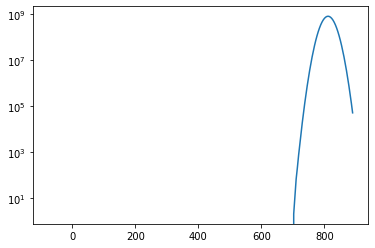

In [13]:
plt.figure()
plt.semilogy(x, p)
plt.show()